<a href="https://colab.research.google.com/github/hhchin1995/water-quality-clustering/blob/main/Coastal_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coastal Water clustering and decision tree for classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install bioinfokit
import bioinfokit

     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56749 sha256=65f65201b627149af7afe38524f928d3a2df22d624a7fdc4cee743a7205ad14a
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=6beb1ca6c5cbb3b4169f6c912d72b6bec8833756ee2d675091ee0e312c737715
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


## Importing the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

# dataset = pd.read_csv('PRES_plastic4-1.csv')
dataset = pd.read_csv('Coastal water_3.csv')
# PET
# X = dataset.iloc[:-54, 2:4].values
# y = dataset.iloc[:-54, 5].values

# PE
# X = dataset.iloc[15:-20, 2:5].values
# X[:,1]=X[:,2]
# X=X[:,:-1]
# y = dataset.iloc[15:-20, 5].values



# PP
# X = dataset.iloc[50:, 2:5].values
# X[:,1]=X[:,2]
# X=np.delete(X,8,0)
# X=X[:,:-1]
# y = dataset.iloc[50:, 5].values
# y=np.delete(y,8,0)
X_c = dataset.iloc[0:300, 0:19].values


Supply=dataset.iloc[300:304,0:19].values
Demand=dataset.iloc[304:307,0:19].values

print(Supply)
print(Demand)



Saving Coastal water_3.csv to Coastal water_3 (2).csv
[[3.44123576e+01 1.85692803e+01 8.15407588e+00 5.46287907e+00
  1.32392023e+00 4.31499212e+01 8.49039080e-02 5.72296840e-02
  5.58392260e-01 4.63016400e-03 3.56959500e-03 3.16486673e+00
  7.46514330e+01 1.10157662e+00 5.88802660e-02 6.77619520e-02
  7.90386000e-04 9.13350599e-01 3.78707740e-02]
 [2.92147887e+01 1.98423347e+01 8.06032844e+00 5.79649029e+00
  1.53055038e+00 1.74940549e+01 1.15471652e-01 1.20733066e-01
  3.15497312e-01 1.49016930e-02 2.57646280e-02 2.54177052e+01
  1.00415680e+02 5.16567717e+00 7.02647023e-01 4.31032930e+00
  5.67921410e-02 1.34457760e+00 2.09764271e-01]
 [3.08958643e+01 2.59389056e+01 8.11440709e+00 8.52694151e+00
  2.25102487e+00 2.21050164e+01 4.30136564e-01 2.01932229e+00
  3.33553174e-01 7.22720290e-02 7.32270878e-01 4.20888395e+01
  2.45393088e+02 1.26688292e+01 2.37471385e+00 8.96680829e+01
  2.22183375e-01 5.80596512e+00 4.11236658e-01]
 [2.24599008e+01 2.21331259e+01 8.35726847e+00 6.13849319e

## Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# sc.fit(X_c)
# X_c=sc.transform(X_c)
X_c=sc.fit_transform(X_c)

Supply=sc.transform(Supply)
Demand=sc.transform(Demand)
# X_test_sc=sc.transform(X_test)



Custom Sampling (clean data)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Scale Features
scaler = StandardScaler()
x_c_scaled = X_c


# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_c_scaled, y_train)
preds = pd.DataFrame(knn.predict_proba(x_c_scaled))

preds.columns = ['label_0', 'label_1','label_2','label_3','label_4']

# Bind defaulted label proba to train dataset
# print(preds.iloc[1,2])

y_prob=np.zeros((len(y_train),1))
for i in range(0,len(y_train)):
  y_prob[i]=preds.iloc[i,int(y_train[i])-1]

#print(y_prob)
# X_train['knn_minority_class_proba'] = preds['label_1']

x_c_filtered=np.zeros(X_c.shape)
y_train_filtered=np.zeros(X_c.shape[0])

for ii in range(0,len(y_train_filtered)):
  if y_prob[ii]>=0.5:
    x_c_filtered[ii,:] = X_c[ii,:]
    y_train_filtered[ii] = y_train[ii]

x_c_filtered=x_c_filtered[np.all(x_c_filtered != 0, axis=1), :]
y_train_filtered=y_train_filtered[y_train_filtered >0]


# Oversample using SMOTE
sm = SMOTE(k_neighbors=1,random_state=40)
X_c, y_train = sm.fit_resample(x_c_filtered, y_train_filtered)

print(X_c)

Clustering

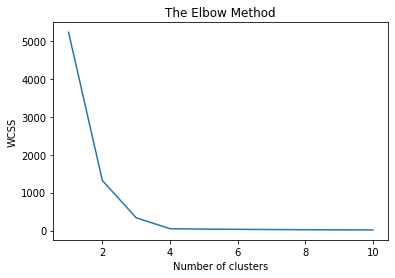

In [ ]:
# Using the elbow method to find the optimal number of clusters




#####X_c=X_train


#X_c = sc.fit_transform(X_c)




from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying PCA on data**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)    # Set to 7 for 90% variance
X_c= pca.fit_transform(X_c)
Supply=pca.transform(Supply)
Demand=pca.transform(Demand)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# # loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],
# # #                                                    'PC7', 'PC8','PC9', 'PC10','PC11', 'PC12',
# # #                                                    'PC13', 'PC14'],
# #                          index=dataset.columns[2:])
# # print(loadings)

# Applying Kernel PCA
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 2, kernel = 'rbf')
# X_c = kpca.fit_transform(X_c)

# Supply=kpca.transform(Supply)
# Demand=kpca.transform(Demand)

# # X_test_kpca=kpca.transform(X_test_sc)

# kpca_transform = kpca.fit_transform(X_c)
# explained_variance = np.var(kpca_transform, axis=0)
# ev = explained_variance / np.sum(explained_variance)
# print(ev)
# print(sum(ev))

# print(X_test_kpca)



[0.88321424 0.03357643]
0.9167906676100107


(300, 2)
0.8613435814293572
0.18757862489401106
10257.440382599973


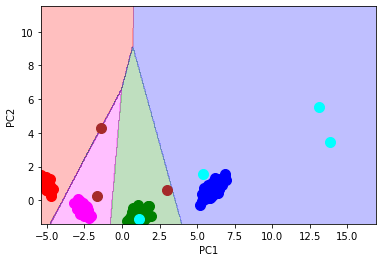

In [ ]:

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_c)
Supply_kmeans=kmeans.predict(Supply)
Demand_kmeans=kmeans.predict(Demand)
#X_c = sc.inverse_transform(X_c)
# kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_)

# Visualising the clusters
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-0.01, stop = X_c[:, 0].max()+10, step = 0.05),
                     np.arange(start = X_c[:, 1].min()-0.01, stop = X_c[:, 1].max()+10, step = 0.05))
plt.contourf(X1, X2, kmeans.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue','green','magenta')))

plt.scatter(X_c[y_kmeans == 0, 0], X_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_kmeans == 1, 0], X_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_kmeans == 2, 0], X_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_kmeans == 3, 0], X_c[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')

plt.scatter(Supply[Supply_kmeans == 0, 0], Supply[Supply_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 1, 0], Supply[Supply_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 2, 0], Supply[Supply_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 3, 0], Supply[Supply_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Demand[Demand_kmeans == 0, 0], Demand[Demand_kmeans == 0, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[Demand_kmeans == 1, 0], Demand[Demand_kmeans == 1, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[Demand_kmeans == 2, 0], Demand[Demand_kmeans == 2, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[Demand_kmeans == 3, 0], Demand[Demand_kmeans == 3, 1], s = 100, c = 'brown', label = 'Demand')
# plt.scatter(X_c[y_kmeans == 4, 0], X_c[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2 ')
# plt.legend()
# plt.show()
print(X_c.shape)
# Evaluation
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
print(metrics.silhouette_score(X_c, labels, metric='euclidean'))
print(davies_bouldin_score(X_c, labels))
print(metrics.calinski_harabasz_score(X_c, labels))

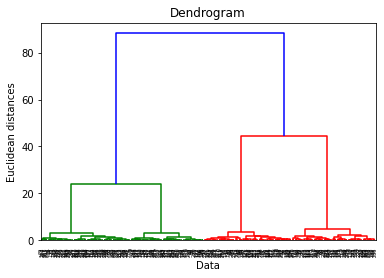

In [ ]:
import scipy.cluster.hierarchy as sch
#X_c = sc.fit_transform(X_c)

dendrogram = sch.dendrogram(sch.linkage(X_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)



# Evaluation
print(metrics.silhouette_score(X_c, y_hc, metric='euclidean'))
print(davies_bouldin_score(X_c, y_hc))
print(metrics.calinski_harabasz_score(X_c, y_hc))

0.8613435814293572
0.18757862489401106
10257.440382599973


In [ ]:
# Fit KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_c, y_hc)

y_supply=knn.predict(Supply)
y_demand=knn.predict(Demand)

preds_supply = pd.DataFrame(knn.predict_proba(Supply))

preds_demand = pd.DataFrame(knn.predict_proba(Demand))

preds_supply.columns = ['label_0', 'label_1','label_2','label3']
preds_demand.columns = ['label_0', 'label_1','label_2','label3']

print(preds_supply)
print(preds_demand)

   label_0  label_1  label_2  label3
0      1.0      0.0      0.0     0.0
1      1.0      0.0      0.0     0.0
2      1.0      0.0      0.0     0.0
3      0.0      0.0      1.0     0.0
   label_0  label_1  label_2  label3
0      0.0     0.25      0.0    0.75
1      0.0     0.00      0.0    1.00
2      0.0     0.00      1.0    0.00


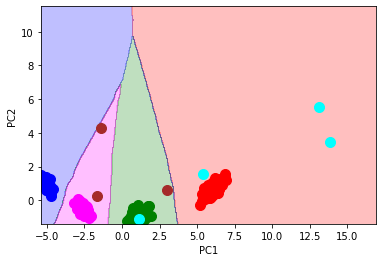

In [ ]:
# Visualising the clusters
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_c, y_hc)

X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-0.01, stop = X_c[:, 0].max()+10, step = 0.05),
                     np.arange(start = X_c[:, 1].min()-0.01, stop = X_c[:, 1].max()+10, step = 0.05))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'blue','green','magenta')))

plt.scatter(X_c[y_hc == 0, 0], X_c[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_hc == 1, 0], X_c[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_hc == 2, 0], X_c[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_hc == 3, 0], X_c[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')

plt.scatter(Supply[y_supply == 0, 0], Supply[y_supply == 0, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 1, 0], Supply[y_supply == 1, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 2, 0], Supply[y_supply == 2, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Demand[y_demand == 0, 0], Demand[y_demand == 0, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[y_demand == 1, 0], Demand[y_demand == 1, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[y_demand == 2, 0], Demand[y_demand== 2, 1], s = 100, c = 'brown', label = 'Demand')
plt.scatter(Demand[y_demand == 3, 0], Demand[y_demand== 3, 1], s = 100, c = 'brown', label = 'Demand')
# plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.legend()
plt.show()

**DBSCAN**

In [ ]:
i=np.identity(dataset.shape[1]-2)
print(pca.transform(i))

[[ 0.24047763  0.12585364]
 [ 0.1915152   0.38887186]
 [ 0.25987549 -0.02594473]
 [ 0.22735792  0.30938942]
 [ 0.29270299  0.12400405]
 [ 0.27455235 -0.11356291]
 [ 0.18191918 -0.04044776]
 [ 0.09498813 -0.05360648]
 [ 0.25988127 -0.04787519]
 [ 0.26716293 -0.03215638]
 [ 0.20028072  0.36740759]
 [ 0.21979492  0.33937065]
 [ 0.19512607 -0.28386288]
 [ 0.15585633  0.27225593]
 [ 0.16509275 -0.11903487]
 [-0.21263366  0.16336045]
 [ 0.09070376 -0.19443126]
 [ 0.19044967 -0.0882263 ]
 [ 0.21966761 -0.14127231]
 [ 0.24482695 -0.31879575]
 [ 0.26121121 -0.29587361]]


In [ ]:
from sklearn.cluster import DBSCAN
#X_c = sc.fit_transform(X_c)
db = DBSCAN(eps=0.15, min_samples=30).fit(X_c)
labels = db.labels_
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_c, labels))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
Silhouette Coefficient: 0.424


In [ ]:
from sklearn.cluster import AffinityPropagation
# Compute Affinity Propagation
af = AffinityPropagation(preference=-0.4, random_state=10,affinity='euclidean').fit(X_c)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(labels)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X_c, labels, metric="sqeuclidean")
)

[0 3 6 2 1 3 0 1 3 3 1 3 5 2 5 4 0 6 5 4 6 3 3 6 1 3 5 0 5 3 0 4 4 2 1 3 4
 3 6 3 1 3 1 0 3 4 3 6 3 3 1 6 4 1 1 1 4 5 5 3 0 3 2 4 3 1 1 3 6 3 3 6 1 3
 5 4 1 3 3 0 3 3 0 3 1 0 5 4 3 1 3 1 3 4 4 5 5 1 5 3 3 3 0 3 3 6 0 1 6 3 2
 5 5 5 1 4 3 2 0 3 3 2 3 0 2 5 3 1 1 1 0 6 1 0 3 3 4 1 6 1 4 4 6 4 3 0 1 3
 4 3 4 4 2 0 4 3 4 2 3 2 1 3 3 3 3 6 1 6 2 3 6 4 0 4 6 3 3 5 5 1 1 1 5 4 2
 3 2 3 1 3 6 2 4 3 4 4 6 3 5 0 4 6 5 2 1 0 5 6 6 2 1 1 6 3 5 2 3 6 3 5 3 4
 2 4 1 4 5 5 3 3 4 1 2 4 3 2 1 0 6 1 3 4 2 4 6 5 6 5 5 5 6 4 1 3 4 4 5 1 6
 1 5 5 3 5 4 0 3 1 1 0 3 6 3 4 5 4 4 4 3 0 2 3 3 3 3 1 2 3 3 0 3 3 3 5 3 3
 2 1 3]
Estimated number of clusters: 7
Silhouette Coefficient: 0.492


Decision Tree

|--- PC1 <= -0.89
|   |--- PC2 <= 0.17
|   |   |--- class: 3
|   |--- PC2 >  0.17
|   |   |--- class: 1
|--- PC1 >  -0.89
|   |--- PC2 <= -0.14
|   |   |--- class: 2
|   |--- PC2 >  -0.14
|   |   |--- class: 0



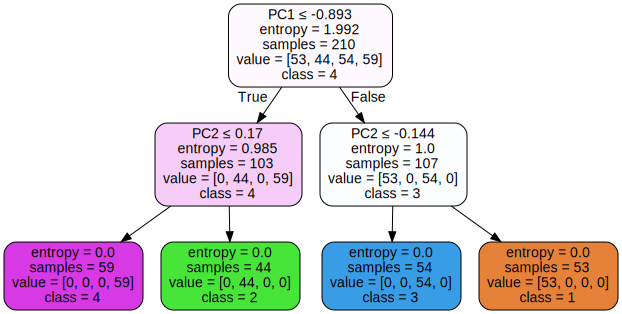

In [ ]:
#graph.render("iris") 
features=['PC1','PC2']
# features=['pH','DO','BOD','COD','Perm','SS','NH3','Nitrates','Chlorides','Fe','Mang','AB','CCL']
classes=['1','2','3','4']

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_c, y_ori, test_size = 0.3, random_state = 10) 
X_train, X_test, y_train, y_test = train_test_split(X_c, y_hc, test_size = 0.3, random_state = 10) 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 25,max_features=2,max_depth=2) #PE Random_state = 25,  #PP Random_state = 0. #PET Random_state=25
classifier.fit(X_train, y_train)
# classifier.fit(X_c, y_kmeans)
#tree.plot_tree(classifier)

r=export_text(classifier,feature_names=features)
print(r)




import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

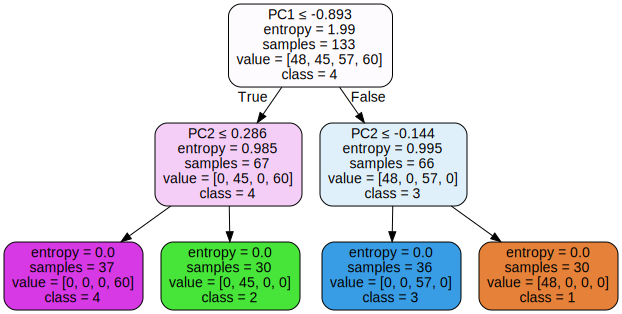

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0,max_features=2,max_depth=2)
classifier2.fit(X_train, y_train)
estimator=classifier2.estimators_[5]

dot_data2 = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph2 = graphviz.Source(dot_data2) 
graph2

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(accuracy_score(y_test, y_pred2))

target_names = classes
print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred2, target_names=target_names))

[[21  0  1  0]
 [ 0 22  0  0]
 [ 0  0 25  0]
 [ 0  0  0 21]]
0.9888888888888889
[[22  0  0  0]
 [ 0 22  0  0]
 [ 0  0 25  0]
 [ 0  0  0 21]]
1.0
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        22
           3       0.96      1.00      0.98        25
           4       1.00      1.00      1.00        21

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        21

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1